
# Importing the libraries

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,MinMaxScaler

# Importing the dataset and removing unnecessary columns from the dataset

In [ ]:
dataset = pd.read_csv('warranty_claims.csv')
dataset.drop('ID', axis=1,inplace = True)
dataset

,Area,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,Rural,Personal,Household,AC,0.0,1.0,2.0,0.0,0.0,0.0,4474.0,12.0,202.0,Manufacturer,30.0,Claim,0
1,Urban,Personal,Entertainment,TV,0.0,0.0,0.0,1.0,1.0,1.0,25000.0,13.0,60.0,Dealer,1.3,Complaint,0
2,Rural,Business,Household,AC,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,12.0,3.0,Dealer,2.5,Claim,0
3,Rural,Personal,Entertainment,TV,0.0,0.0,0.0,1.0,1.0,0.0,4216.0,10.0,672.0,Dealer,25.0,Other,0
4,Rural,Business,Household,AC,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,13.0,3.0,Manufacturer,6.5,Claim,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336,Urban,Personal,Household,AC,0.0,1.0,1.0,0.0,0.0,0.0,10000.0,14.0,15.0,Dealer,2.6,Claim,0
8337,Rural,Personal,Household,AC,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,13.0,4.0,Manufacturer,1.3,Complaint,0
8338,Urban,Personal,Household,AC,0.0,1.0,0.0,0.0,0.0,0.0,2000.0,12.0,61.0,Dealer,24.0,Claim,0
8339,Urban,Personal,Household,AC,1.0,1.0,1.0,0.0,0.0,0.0,6000.0,15.0,280.0,Dealer,21.0,Complaint,0


#Checking missing values

**Function to verify if there's any missing value**

In [ ]:
def checkMissValues(dataset):
  missing_values = dataset.isna().sum()
  print(missing_values)


In [ ]:
checkMissValues(dataset)

Area                  0
Consumer_profile      0
Product_category      0
Product_type          0
AC_1001_Issue         0
AC_1002_Issue         0
AC_1003_Issue         0
TV_2001_Issue         0
TV_2002_Issue         0
TV_2003_Issue         0
Claim_Value         240
Service_Centre        0
Product_Age           0
Purchased_from        0
Call_details          0
Purpose               0
Fraud                 0
dtype: int64


In [ ]:
#Using an imputer allows us to have more control over how missing values are handled in your dataset compared to using the default mean values of a DataFrame.
column_impute = dataset[['Claim_Value']]
imputer = SimpleImputer(missing_values=np.nan,strategy = 'mean')
imputer.fit(column_impute)
dataset['Claim_Value'] = imputer.transform(column_impute)
dataset['Claim_Value']

0        4474.0
1       25000.0
2       10000.0
3        4216.0
4       20000.0
         ...   
8336    10000.0
8337    50000.0
8338     2000.0
8339     6000.0
8340    10000.0
Name: Claim_Value, Length: 8341, dtype: float64

In [ ]:
checkMissValues(dataset)

Area                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64


#Normalisation

**Numeric features should be standardized if the data is normally distibuted (if the histogram is roughly “bell-shaped”, then the data is assumed to be normally distributed), otherwise it should be normalized**

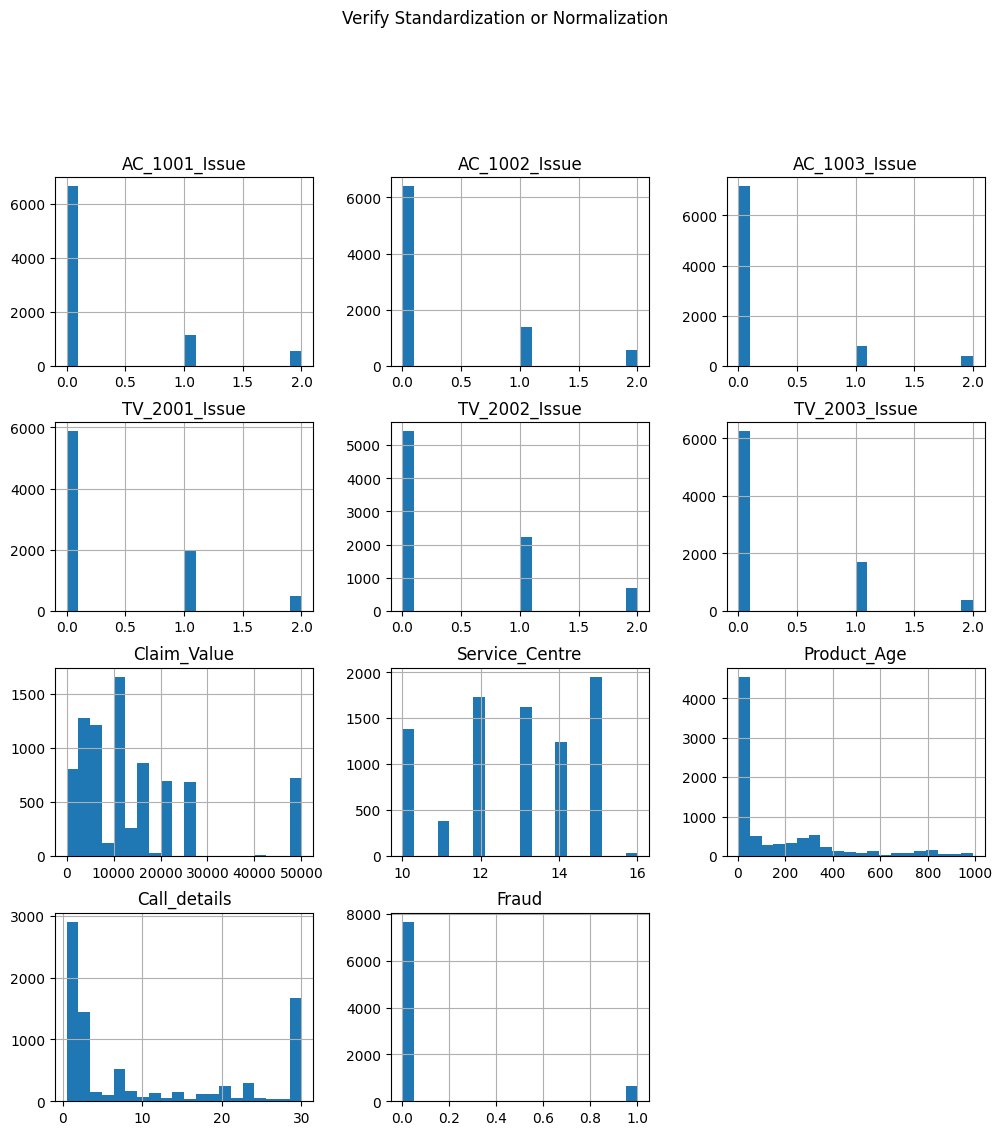

In [ ]:
dataset.hist(bins = 20,figsize=(12, 12))
plt.suptitle("Verify Standardization or Normalization", y=1.02)
plt.show()

**Normalize the data.**

In [ ]:
# Select columns with numeric data types (int64 and float64) as well as any other numeric types (e.g., int32, float32)
num_col = dataset.select_dtypes(include=['int64', 'float64','number']).columns
# Initialize a MinMaxScaler, which will scale numeric features to a specified range (usually [0, 1])
scaler = MinMaxScaler()
# Iterate through each column in 'num_col' to perform Min-Max scaling
for col in num_col:
  scaler = MinMaxScaler()
  dataset[col] = scaler.fit_transform(dataset[[col]])
dataset

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
0,0.0,0.5,1.0,0.0,0.0,0.0,0.08948,0.333333,0.201417,1.000000,0.0
1,0.0,0.0,0.0,0.5,0.5,0.5,0.50000,0.500000,0.057692,0.027119,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.20000,0.333333,0.000000,0.067797,0.0
3,0.0,0.0,0.0,0.5,0.5,0.0,0.08432,0.000000,0.677126,0.830508,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.40000,0.500000,0.000000,0.203390,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8336,0.0,0.5,0.5,0.0,0.0,0.0,0.20000,0.666667,0.012146,0.071186,0.0
8337,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,0.500000,0.001012,0.027119,0.0
8338,0.0,0.5,0.0,0.0,0.0,0.0,0.04000,0.333333,0.058704,0.796610,0.0
8339,0.5,0.5,0.5,0.0,0.0,0.0,0.12000,0.833333,0.280364,0.694915,0.0


**One hot encoding**

In [ ]:
categorical_columns = dataset.select_dtypes(include=['object']).columns
dataset = pd.get_dummies(dataset, columns=categorical_columns)
dataset

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
0,0.0,0.5,1.0,0.0,0.0,0.0,0.08948,0.333333,0.201417,1.000000,0.0
1,0.0,0.0,0.0,0.5,0.5,0.5,0.50000,0.500000,0.057692,0.027119,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.20000,0.333333,0.000000,0.067797,0.0
3,0.0,0.0,0.0,0.5,0.5,0.0,0.08432,0.000000,0.677126,0.830508,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.40000,0.500000,0.000000,0.203390,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8336,0.0,0.5,0.5,0.0,0.0,0.0,0.20000,0.666667,0.012146,0.071186,0.0
8337,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,0.500000,0.001012,0.027119,0.0
8338,0.0,0.5,0.0,0.0,0.0,0.0,0.04000,0.333333,0.058704,0.796610,0.0
8339,0.5,0.5,0.5,0.0,0.0,0.0,0.12000,0.833333,0.280364,0.694915,0.0


#Classification


**Split the data into X and Y**


In [ ]:
x_value = dataset.drop('Fraud', axis=1)  # Drop the target column for features
y_value = dataset['Fraud']

x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size=0.2, random_state=42)

In [ ]:
# 5-Fold cross-validation involves dividing the dataset into five equal subsets.
# Then, four of these subsets are used as the training set and the remaining subset is used as the test set.
# This process is repeated five times, with each subset used exactly once as the test set.
# This approach reduces overfitting and improves the accuracy of the model.

# Algorithm picks
# 1. Logistic Regression - simple, interpretable, works well for linearly separable data. But may not handle complex relationships well.
# 2. Decision Tree - Simple to understand, can handle non-linear relationships. But prone to overfitting, sensitive to small variations in the data.
# 3. Random Forest - Ensemble of decision trees, reduces overfitting, often performs well. But complexity, harder to interpret than a single decision tree.
# 4. Support Vector Machine (SVM) - Effective in high-dimensional spaces, versatile with different kernel functions. But memory-intensive, less effective on large datasets.
# 5. Naive Bayes - Simple, fast, works well for text classification and other categorical data. But assumes independence between features.
# 6. K-Nearest Neighbors (KNN) -  Intuitive, no training phase, can handle complex relationships. But computationally expensive during prediction, sensitive to irrelevant features.

classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Decision Tree", DecisionTreeClassifier(random_state = 50)),
    ("Random Forest", RandomForestClassifier(random_state = 50)),
    ("Support Vector Machine", SVC(probability=True)),
    ("Naive Bayes", GaussianNB()),
    ("K-Nearest Neighbors", KNeighborsClassifier())
   # ("MLPClassifier", MLPClassifier(max_iter = 1000, random_state = 50))
]


**Metrics**

* Accuracy: It is the ratio of the number of correct predictions to the total number of predictions. It can be useful for balanced datasets but it is not suitable for imbalanced datasets because it is sensitive to class imbalance.

* F1-Score: It is the harmonic mean of precision and recall. Precision is the ratio of the number of true positive predictions to the total number of positive predictions, while recall is the ratio of the number of true positive predictions to the total number of actual positive instances

* AUC: It is a metric used for binary classification problems. The AUC score ranges from 0.5 (inclusive) to 1.0 (exclusive), where 0.5 is considered random, and 1.0 is considered perfect.

**Perform 5-Fold Cross validation with each algorithm**

In [ ]:
for a_name, clf in classifiers:

    scores_accuracy = cross_val_score(clf, x_value, y_value, cv=KFold(n_splits=5, shuffle=True, random_state=1), scoring='accuracy')
    scores_f1 = cross_val_score(clf, x_value, y_value, cv=KFold(n_splits=5, shuffle=True, random_state=1), scoring='f1')
    scores_auc = cross_val_score(clf, x_value, y_value, cv=KFold(n_splits=5, shuffle=True, random_state=1), scoring='roc_auc')

    print(f"{a_name}:")
    print(f"  Accuracy: {np.mean(scores_accuracy)}")
    print(f"  F1-score: {np.mean(scores_f1)}")
    print(f"  AUC: {np.mean(scores_auc)}\n")

Logistic Regression:
  Accuracy: 0.920153870911659
  F1-score: 0.0
  AUC: 0.7155711510420817

Decision Tree:
  Accuracy: 0.9743439759875743
  F1-score: 0.825027088357641
  AUC: 0.9928805519314897

Random Forest:
  Accuracy: 0.9743439759875743
  F1-score: 0.825027088357641
  AUC: 0.9928463557155176

Support Vector Machine:
  Accuracy: 0.9304637536226261
  F1-score: 0.2245466113820544
  AUC: 0.8945280050085801

Naive Bayes:
  Accuracy: 0.7967867287955136
  F1-score: 0.15206505287918198
  AUC: 0.682070679100077

K-Nearest Neighbors:
  Accuracy: 0.9689492264786134
  F1-score: 0.8052703348015093
  AUC: 0.9659821248873499



**Results Interpretation**

1. Decision Tree and Random Forest perform exceptionally well with high accuracy and AUC.
2. SVM has good accuracy but lower than Decision Tree and Random Forest.
3. Naive Bayes shows relatively poor performance, especially in accuracy.
4. KNN performs well with high accuracy and AUC.




#Pipeline

In [ ]:
# Best model from previous phase
classifier = RandomForestClassifier(random_state = 50)

x = dataset.drop(columns=['Fraud'])
y = dataset['Fraud']

num_features = x.select_dtypes(include=['int64', 'float64']).columns
cat_features = x.select_dtypes(include=['object']).columns

# Define your numerical features pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define your categorical features pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),  # num_features should be the list of numerical feature column indices
        ('cat', cat_pipeline, cat_features)   # cat_features should be the list of categorical feature column indices
    ]
)

# Pipeline - streamline a lot of the routine processes, making your workflow more organized, maintainable, and less error-prone
# Create the pipeline with the preprocessor and the best model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Train the pipeline on the complete dataset
pipeline.fit(x_value, y_value)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue', 'TV_2001_Issue',
       'TV_2002_Issue', 'TV_2003_Issue', 'Claim_Value', 'Service_Centre',
       'Product_Age', 'Call_details'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=50))])

In [ ]:
y_pred = pipeline.predict(x)
print(accuracy_score(y_value,y_pred))

0.9756623906006474


In [ ]:
# Serialize
# Commonly used to serialize (save) the entire pipeline
# Including all the preprocessing steps and the trained model.
# This allows you to save the entire state of your machine learning workflow and later reload it for making predictions on new data or for further training.

with open('model.pkl', 'wb') as file:
  pickle.dump(pipeline,file)
